In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris()
print(type(iris))
print(list(iris.keys()))
print(iris.data[:10], iris.target[:10])

<class 'sklearn.utils._bunch.Bunch'>
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]


In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.filename

'iris.csv'

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
len(iris.data)

150

In [16]:
from sklearn.model_selection import  train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)

In [18]:
len(x_train), len(x_test), len(y_train), len(y_test)

(112, 38, 112, 38)

## 观察数据

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
dataframe = pd.DataFrame(x_train, columns=iris.feature_names)
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


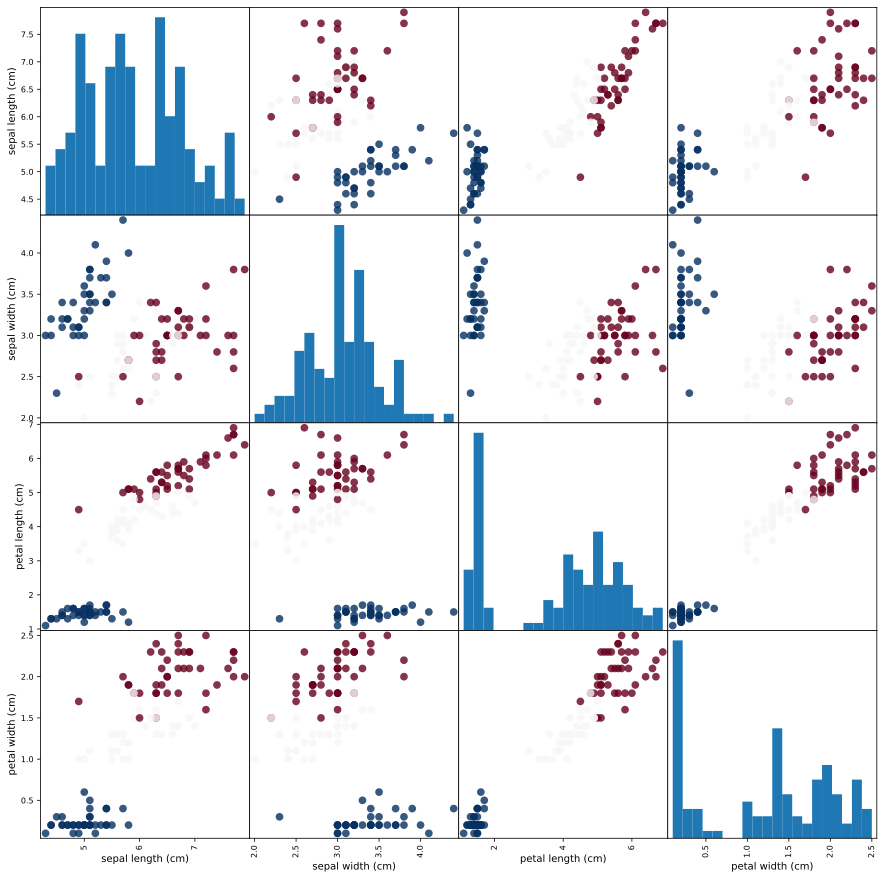

In [27]:
grr = pd.plotting.scatter_matrix(
    dataframe, c=y_train, figsize=(15, 15), marker='o',
    hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=plt.cm.RdBu_r)

## k 近邻算法

In [28]:
from sklearn.neighbors import  KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
import numpy as np

In [34]:
x = np.array([[5, 2.9, 1, 0.2]])
x.shape

(1, 4)

In [36]:
prediction = knn.predict(x)
print(prediction, iris.target_names[prediction])

[0] ['setosa']


## 评估模型

In [37]:
y_pred = knn.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [38]:
np.mean(y_pred == y_test)

0.9736842105263158

In [39]:
knn.score(x_test, y_test)

0.9736842105263158